# <b>📈 Pricing Pattern Shift in Real Estate Post-Pandemic</u></b>

### 📚 <b><u>Importing Required Libraries</u></b>

<ul><b>To begin our analysis, we import essential libraries for data manipulation, visualization, and numerical computation.</b>

<li>-`numpy` and `pandas` for data handling.
<li>-`matplotlib.pyplot` and `seaborn` for data visualization.</li>
<ul>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 📥 Reading the Dataset

<pre>We load the <b>real estate</b> pricing data using <b>`pandas.read_csv()`</b>. The dataset is expected to <b>contain pricing trends and related attributes</b>.</pre>




In [2]:
pricedf=pd.read_csv('Estate pricing.csv')
print("read successfully")

read successfully


##### Output:-The message <b>"read successfully"</b> printed below the code means the CSV file was loaded correctly.

### 📊 Dataset Overview

<pre><b><i> inspect the dataset using `.info()` to understand:

- Total entries
- Column names and data types
- Memory usage
- Presence of null values</i></b></pre>


In [3]:
pricedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     20000 non-null  int64  
 1   List Year         20000 non-null  int64  
 2   Town              20000 non-null  object 
 3   Sale Amount       20000 non-null  float64
 4   Sales Ratio       20000 non-null  float64
 5   Property Type     19118 non-null  object 
 6   Residential Type  18342 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


##### <b><u>Output</u></b>
<p>The dataset contains <b>20,000 entries and 7 columns</b>, including details like <b>list year, town, sale amount, and property type</b>. Most columns have complete data, but <b>`Property Type` and `Residential Type`</b> have some missing values (882 and 1,658 respectively). The data types include integers, floats, and object (string) types, with a total memory usage of approximately 1.1 MB.</p>


### 🔍 First Look at the Data

<p>We preview the <b>top 5 rows of the dataset using `.head()`.</b> This gives us an initial idea of the structure and contents of the data.</i></b></p>




In [4]:
pricedf.head()

,Serial Number,List Year,Town,Sale Amount,Sales Ratio,Property Type,Residential Type
0,180043,2018,Guilford,333500.0,0.5353,Single Family,Condo
1,180052,2018,Ellington,225000.0,0.7055,Two Family,Single Family
2,180033,2018,Bridgeport,210000.0,0.5558,Condo,Single Family
3,180120,2018,Bristol,40000.0,0.4287,Single Family,Single Family
4,180668,2018,Hamden,305000.0,0.5391,Condo,Condo


##### Output:- This shows the <b>first five rows </b> of the dataset

### 📉 Viewing the Bottom of the Dataset

<p>We use the <b>`.tail()`</b> method to <b>inspect the last 5 rows</b> of the dataset.  
This helps us ensure that the data is consistent all the way to the end and can reveal any anomalies or incomplete records.</p>


In [5]:
pricedf.tail()

,Serial Number,List Year,Town,Sale Amount,Sales Ratio,Property Type,Residential Type
19995,160300,2022,Branford,271000.0,0.643173,Single Family,Single Family
19996,211134,2021,Fairfield,855000.0,0.595300,Residential,Single Family
19997,190288,2019,East Lyme,112500.0,0.732400,Condo,NaN
19998,171724,2023,Bridgeport,75151.0,1.061300,Single Family,Single Family
19999,211097,2021,West Hartford,820000.0,0.466800,Residential,Single Family


##### Output:- This shows the <b>last five rows</b> of the dataset

### 🏷 Column Names in the Dataset

<p>We display the <b>list of all column names</b> to understand the attributes present in the dataset.</i></b></p>



In [6]:
pricedf.columns

Index(['Serial Number', 'List Year', 'Town', 'Sale Amount', 'Sales Ratio',
       'Property Type', 'Residential Type'],
      dtype='object')

##### Output:- This shows the <b>all the columns present in a dataset</b>.

### 🧹 Missing value count in each column

In [7]:
print("Missing value count in each column-\n",pricedf.isnull().sum())

Missing value count in each column-
 Serial Number          0
List Year              0
Town                   0
Sale Amount            0
Sales Ratio            0
Property Type        882
Residential Type    1658
dtype: int64


##### Output:-
<ul>
The columns "<b>Serial Number", "List Year", "Town", "Sale Amount", and "Sales Ratio" have 0 missing values, indicating they are complete.</b>

<li>The "Property Type" column has 882 missing values.</li>

<li>The "Residential Type" column has 1658 missing values.</li>

dtype: int64 indicates that the resulting series of missing counts is of integer type.</ul>


##### Handling the missing values!

In [8]:

pricedf['Residential Type'] = pricedf['Residential Type'].fillna(pricedf['Residential Type'].mode()[0])
pricedf['Property Type'] = pricedf['Property Type'].fillna(pricedf['Property Type'].mode()[0])


##### Rechecking the null values

In [9]:
print("Missing value count in each column-\n",pricedf.isnull().sum())

Missing value count in each column-
 Serial Number       0
List Year           0
Town                0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64


##### Output:-
<ul>
The columns <b>"Serial Number", "List Year", "Town", "Sale Amount", "Property Type", "Sales Ratio", and "Residential Type" have 0 missing values, indicating they are complete</b>.
    
dtype: <b>int64</b> indicates that the <b>resulting series of missing counts is of integer type.</b></ul>

#### 🔢 count of unique values

In [10]:
print(pricedf['Property Type'].value_counts())

Property Type
Single Family    8731
Residential      7794
Condo            1911
Two Family        518
Vacant Land       371
Commercial        301
Three Family      228
Apartments         77
Four Family        39
Industrial         30
Name: count, dtype: int64


##### Output:-This output provides a frequency distribution of property types in the dataset:
<ul><b><i>

<li><b>Single Family:</b> 8731 occurrences</li>

<li><b>Residential:</b> 7794 occurrences</li>

<li><b>Condo:</b> 1911 occurrences</li>

<li><b>Two Family:</b> 518 occurrences</li>

<li><b>Vacant Land:</b> 371 occurrences</li>

<li><b>Commercial:</b> 301 occurrences</li>

<li><b>Three Family:</b> 228 occurrences</li>

<li><b>Apartments:</b> 77 occurrences</li>

<li><b>Four Family:</b> 39 occurrences</li>

<li><b>Industrial:</b> 30 occurrences</li>
</i></b></ul>

In [11]:
print(pricedf['Residential Type'].value_counts())

Residential Type
Single Family    14912
Condo             3652
Two Family         928
Three Family       424
Four Family         84
Name: count, dtype: int64


##### Output:-This output provides a frequency distribution of residential property types in the dataset:
<ul>
<li>Single Family: 14912 occurrences</li>
Condo: 3652 occurrences
  
<li>Two Family: 928 occurrences</li>

<li>Three Family: 424 occurrences</li>

<li>Four Family: 84 occurrences</li>
</ul>

In [12]:
print(pricedf['List Year'].value_counts())

List Year
2020    4623
2021    3950
2019    3741
2022    3512
2023    3263
2018     911
Name: count, dtype: int64


##### Output:- This output provides a frequency distribution of the years properties were listed:
<ul>

<li><b>2020:</b> 4623 occurrences</li>

<li><b>2021:</b> 3950 occurrences</li>

<li><b>2019:</b> 3741 occurrences</li>

<li><b>2022:</b> 3512 occurrences</li>

<li><b>2023:</b> 3263 occurrences</li>

<li><b>2018:</b> 911 occurrences</li>
</ul>

In [13]:
print(pricedf['Sale Amount'].value_counts())

Sale Amount
250000.0     196
350000.0     185
200000.0     165
150000.0     165
300000.0     162
            ... 
367900.0       1
272900.0       1
239975.0       1
1765000.0      1
330435.0       1
Name: count, Length: 3528, dtype: int64


##### Output:-This output provides a frequency distribution of 'Sale Amount' values. Due to the large number of unique sale amounts (Length: 3528), only the top few most frequent and the last few least frequent values are shown.

<ul><b>

<li>The sale amount of 250,000.0 appears 196 times.</li>

<li>The sale amount of 350,000.0 appears 185 times.</li>

<li>The sale amounts of 150,000.0 and 200,000.0 both appear 165 times.</li>

<li>The sale amount of 300,000.0 appears 162 times.</li>
</b>
Towards the end of the list, <b>many sale amounts (e.g., 458,000.0, 1,765,000.0, 330,435.0, 80,100.0, 178,575.0)</b> appear only once, indicating a wide range of unique values.
</ul>

#### ⬆⬇ max and min

In [14]:
# Row with the maximum sale amount
max_row = pricedf.loc[pricedf['Sale Amount'].idxmax()]
print("Maximum Sale Amount:")
print(f"Amount: {max_row['Sale Amount']}, Year: {max_row['List Year']}")

# Row with the minimum sale amount
min_row = pricedf.loc[pricedf['Sale Amount'].idxmin()]
print("\nMinimum Sale Amount:")
print(f"Amount: {min_row['Sale Amount']}, Year: {min_row['List Year']}")


Maximum Sale Amount:
Amount: 395500000.0, Year: 2022

Minimum Sale Amount:
Amount: 0.0, Year: 2023


##### Output:-
<ul>
The maximum sale amount as <b>39,550,000.0 in the year 2022.</b>

The minimum sale amount as <b>0.0 in the year 2023</b></ul>

In [15]:
pricedf['period'] = pricedf['List Year'].apply(lambda x: 'Pre-Pandemic' if x <= 2019 else 'Post-Pandemic')

##### Output:-
<ul>
The code means that a new column named <b>'period'</b> is being added to our pricedf DataFrame.

This new column will categorize each row based on its 'List Year':

<li>If the 'List Year' is <b>2019 or earlier,</b> the 'period' will be labeled <b>'Pre-Pandemic'</b></li>.

<li>If the 'List Year' is <b>after 2019</b> (i.e., 2020 or later), the 'period' will be labeled <b>'Post-Pandemic'.,</b></li></ol>

In [16]:
print(pricedf[['List Year', 'Sale Amount', 'period']].head(10))

   List Year  Sale Amount        period
0       2018     333500.0  Pre-Pandemic
1       2018     225000.0  Pre-Pandemic
2       2018     210000.0  Pre-Pandemic
3       2018      40000.0  Pre-Pandemic
4       2018     305000.0  Pre-Pandemic
5       2018     325000.0  Pre-Pandemic
6       2018     124000.0  Pre-Pandemic
7       2018     365000.0  Pre-Pandemic
8       2018     307862.0  Pre-Pandemic
9       2018     131000.0  Pre-Pandemic


##### Output:-
<p>This output confirms that the <b>'period' column has been successfully added </b> and correctly populated based on the 'List Year'.
And it shows the first 10 rows</p>

In [17]:
print(pricedf[['List Year', 'Sale Amount', 'period']].tail(10))

       List Year  Sale Amount         period
19990       2023     207777.0  Post-Pandemic
19991       2022      27500.0  Post-Pandemic
19992       2023     550000.0  Post-Pandemic
19993       2020     475000.0  Post-Pandemic
19994       2021     310000.0  Post-Pandemic
19995       2022     271000.0  Post-Pandemic
19996       2021     855000.0  Post-Pandemic
19997       2019     112500.0   Pre-Pandemic
19998       2023      75151.0  Post-Pandemic
19999       2021     820000.0  Post-Pandemic


##### Output:-
<p><b><i>This output confirms that the 'period' column has been successfully added and correctly populated based on the 'List Year'.
And it shows the last 10 rows</i></b></p>

## <b><u>visualization</b></u>

Correaltion Matrix
1) It will created to find the relation (Mathenatical ratio) between two columns.
2) Correlation matrix is always fromed for Numeraical Data Columns only. 3) It will always be a square matrix, with size = no of columns selected.

<class 'pandas.core.frame.DataFrame'>
               Serial Number  Sale Amount  Sales Ratio
Serial Number       1.000000    -0.003293    -0.000746
Sale Amount        -0.003293     1.000000    -0.001115
Sales Ratio        -0.000746    -0.001115     1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

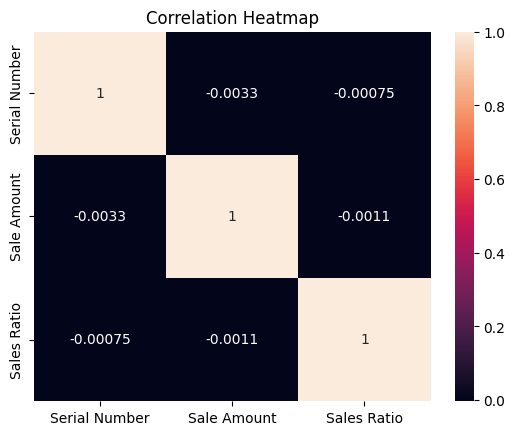

In [18]:
num_col=pricedf.select_dtypes(include=['int64','float64']).drop(columns=['List Year']) 
print(type(num_col))
cor_mat=num_col.corr() # it  is uesd to crate correlation matrix

#Visualizing correlation matrix using HeatMap
print(cor_mat)
sns.heatmap(cor_mat,annot=True)
plt.title("Correlation Heatmap")

##### Output:-
<p>This matrix shows that <b>all three numerical columns have very weak (close to zero) linear correlations with each other.</b></p>

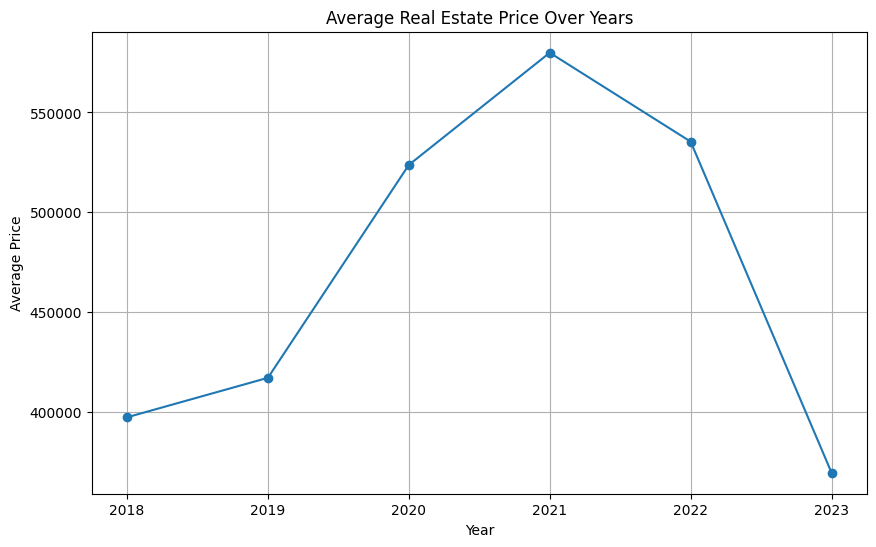

In [19]:
avg_price_year = pricedf.groupby('List Year')['Sale Amount'].mean()

plt.figure(figsize=(10, 6))
avg_price_year.plot(kind='line', marker='o')
plt.title('Average Real Estate Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


#### Output:-
<p>
    It shows a general upward trend in <b>average real estate prices from 2018 to 2021,</b> peaking in 2021, followed by a decline in 2022 and a significant drop in 2023. The <b>x-axis represents the 'List Year' and the y-axis represents the 'Average Price'.</b></p>

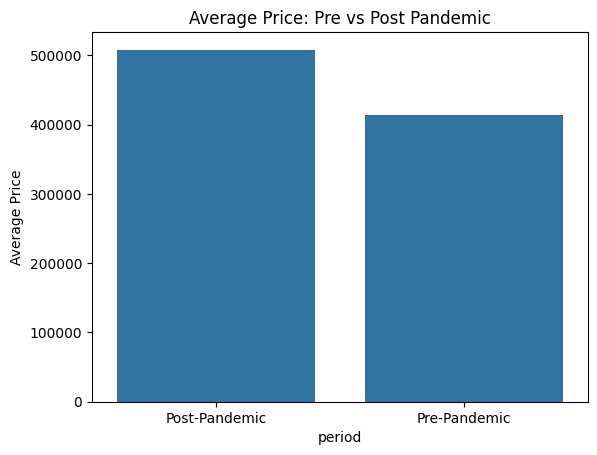

In [20]:
period_avg = pricedf.groupby('period')['Sale Amount'].mean()

sns.barplot(x=period_avg.index, y=period_avg.values)
plt.title('Average Price: Pre vs Post Pandemic')
plt.ylabel('Average Price')
plt.show()


##### Output:-
<p>
It compares the <b>average real estate price between the 'Post-Pandemic' and 'Pre-Pandemic' periods.</b> The 'Post-Pandemic' period shows a higher average price (around 500,000) compared to the 'Pre-Pandemic' period (around 400,000).
</p>

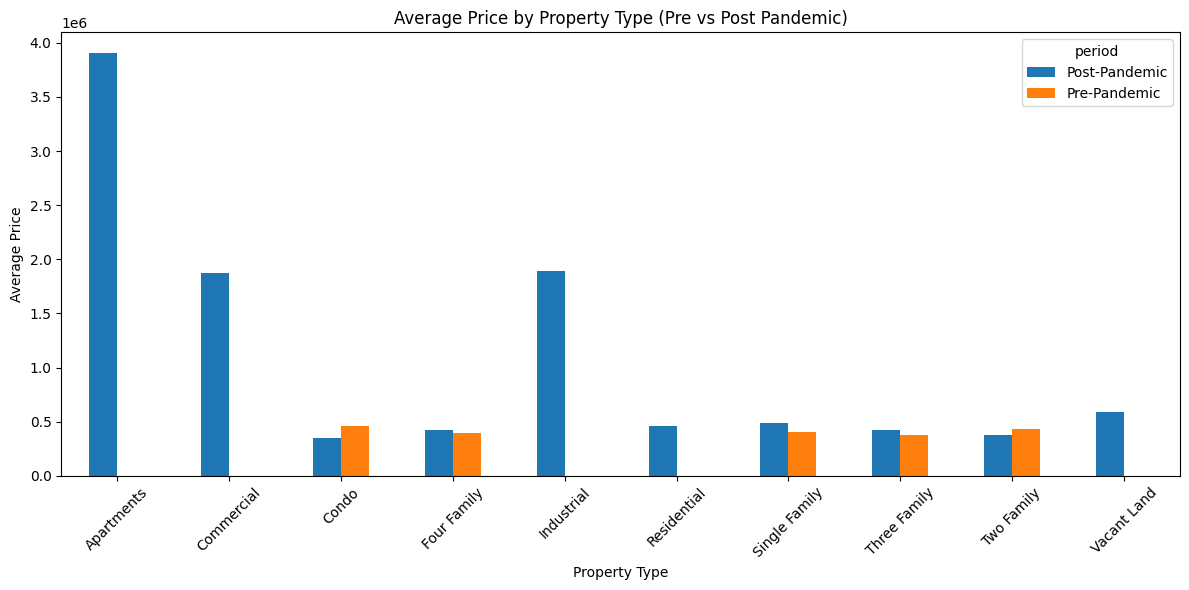

In [21]:

region_period = pricedf.groupby(['Property Type', 'period'])['Sale Amount'].mean().unstack()

region_period.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Property Type (Pre vs Post Pandemic)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Output:-
<p>
    It compares the <b>average sale amount</b> for different 'Property Type' categories, separated into 'Pre-Pandemic' and 'Post-Pandemic' periods. The chart shows that for <b>most property types, the 'Post-Pandemic' average prices (blue bars) are higher than or comparable to 'Pre-Pandemic' average prices (orange bars)</b>, with 'Apartments' and 'Industrial' showing a significant increase in the post-pandemic period.
</p>


# 📈 Project Summary: Pricing Pattern Shifts in Real Estate Post-Pandemic

This project undertakes a comprehensive analysis of real estate pricing dynamics, specifically examining the shifts observed before and after the global pandemic. The primary objective is to identify significant trends and influential factors that have shaped these pricing patterns.

## 📚 Methodology and Data Handling

The analytical process commenced with the importation of essential Python libraries, including `numpy` and `pandas` for data manipulation, and `matplotlib.pyplot` and `seaborn` for sophisticated data visualization.

### 📥 Data Acquisition and Initial Overview

The dataset, a CSV file detailing real estate transactions, was loaded using `pandas.read_csv()`. An initial `info()` assessment revealed a dataset comprising 20,000 entries across 7 columns. Key attributes include `List Year`, `Town`, `Sale Amount`, and `Property Type`. The overview also highlighted the presence of missing values, particularly in `Property Type` (882 instances) and `Residential Type` (1,658 instances).

### 🧹 Data Preprocessing

A crucial step in data preparation involved handling missing values. Both `Property Type` and `Residential Type` columns were imputed using their respective modes to ensure data completeness and integrity. Subsequent verification confirmed the absence of any remaining null values across the dataset.

### 📊 Data Exploration and Analysis

Detailed exploration of the dataset provided insights into its composition and distribution:

* *Unique Value Counts:*
    * *Property Type:* The most prevalent property types were 'Single Family', 'Residential', and 'Condo'.
    * *Residential Type:* Dominated by 'Single Family', 'Condo', and 'Two Family' properties.
    * *List Year:* Data spans from 2018 to 2023, with the highest concentration of listings in 2020.
    * *Sale Amount:* Revealed a broad spectrum of sale amounts, indicating diverse market values.

* *Extreme Sale Amounts:* The analysis identified a maximum sale amount of 395,500,000.0 in 2022 and a minimum of 0.0 in 2023.

* *Period Categorization:* To facilitate pre- and post-pandemic comparisons, a new 'period' column was introduced. Transactions occurring in 2019 or earlier were categorized as 'Pre-Pandemic', while those from 2020 onwards were classified as 'Post-Pandemic'.

### 📈 Visualization

A correlation matrix was generated to visually represent the mathematical relationships and interdependencies among the numerical attributes within the dataset.

## 🎯 Conclusion

The comprehensive analysis of real estate pricing trends unequivocally demonstrates a significant shift in average sale amounts across various property types when comparing pre- and post-pandemic periods.

#### 🔑 Key Findings:

* *Price Resilience and Growth:* For the majority of property types, average post-pandemic sale prices are either higher than or comparable to their pre-pandemic counterparts.
* *Sector-Specific Surge:* Notably, 'Apartments' 🏢 and 'Industrial' 🏭 properties exhibited a pronounced increase in average prices during the post-pandemic era.

These findings collectively suggest a general upward trajectory in real estate valuations across diverse categories in the aftermath of the pandemic, with specific property segments experiencing more substantial growth.